<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [209]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [210]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [211]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [212]:
"""Строим графики чтобы посмотреть в каких столбцах у нас есть выбросы.
 Для этого создадим функцию def get_boxplot(column).""" 
def get_boxplot(data, column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column,
                data=data,
                ax=ax)
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [213]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/МФТИ/6. Д.З/train.csv')

In [214]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [215]:
data.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [216]:
data[data['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [217]:
data.TotalSpent = data.TotalSpent.str.replace(' ', '')
data.TotalSpent = data.TotalSpent.apply(lambda x: None if x=='' else x)


In [218]:
data.dropna(axis=0, inplace=True)
data.TotalSpent.isna().sum()

0

In [219]:
data['TotalSpent'] = data['TotalSpent'].astype(float)

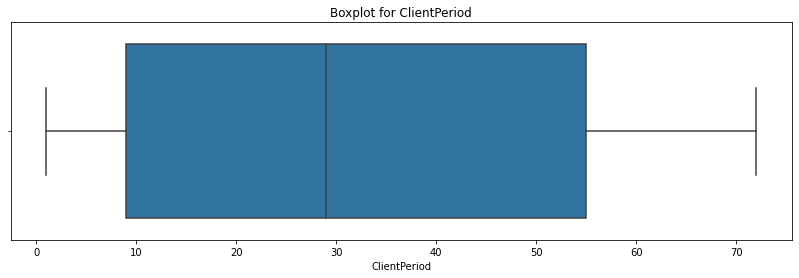

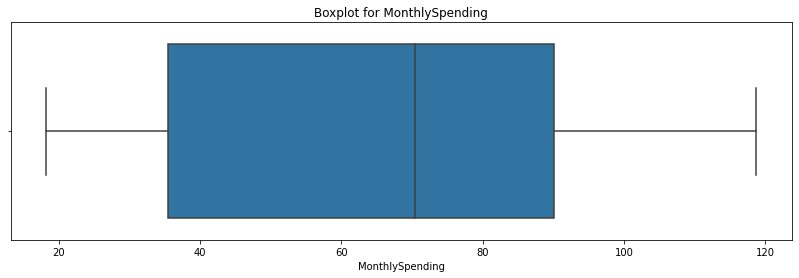

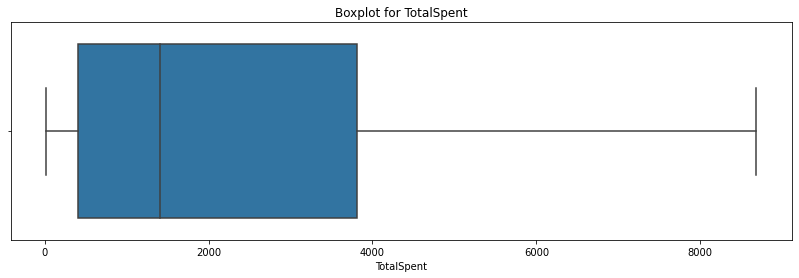

In [220]:
for col in num_cols:
  get_boxplot(data, col)

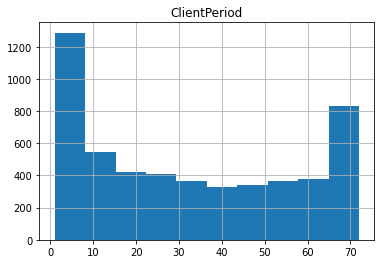

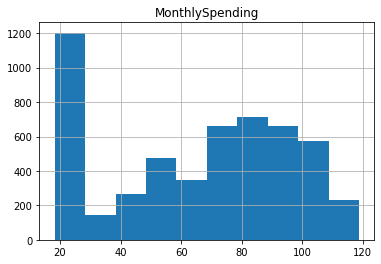

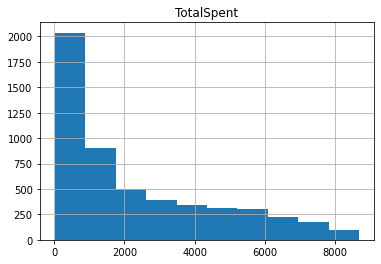

In [221]:
for col in num_cols:
  plt.figure()
  display(data[col].hist())
  plt.title(col)

In [222]:
for col in num_cols:
  data[col] = np.log(data[col] + 1)

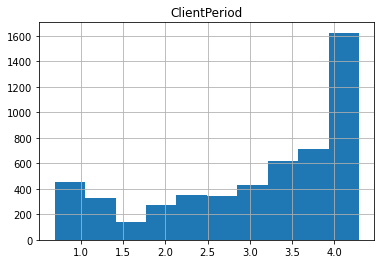

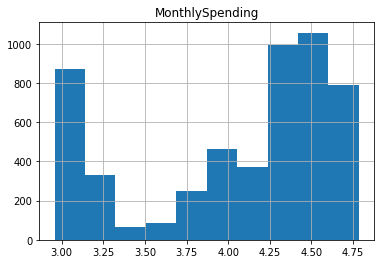

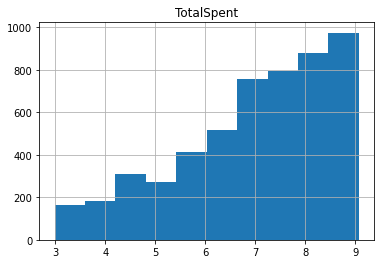

In [223]:
for col in num_cols:
  plt.figure()
  display(data[col].hist())
  plt.title(col)

In [224]:
right_quantile = data.loc[:, 'TotalSpent'].quantile(0.75)
right_quantile

8.244951303452334

In [225]:
# сколько значений находится в правом квантиле
data[data.TotalSpent >= right_quantile].TotalSpent.count()

1319

In [226]:
# 1 удалим значения с правым квантилем roc_auc_score 0.735343665768194
data = data[data.TotalSpent <= right_quantile]

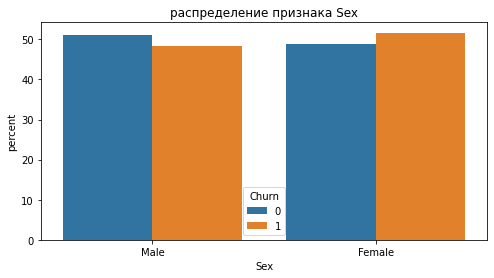

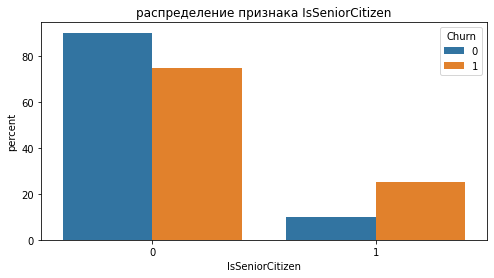

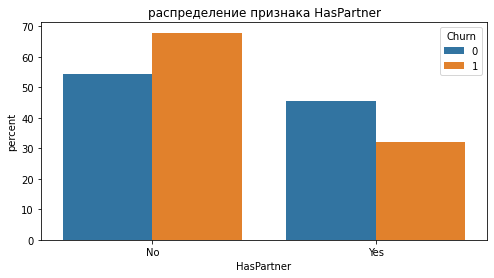

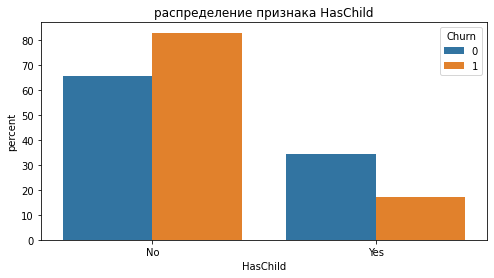

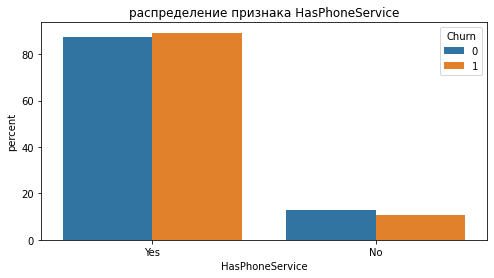

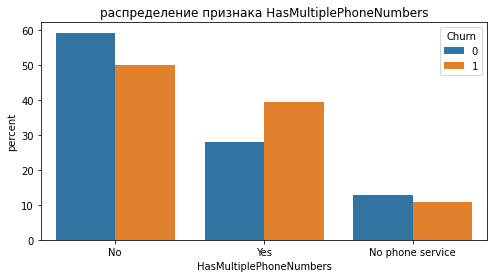

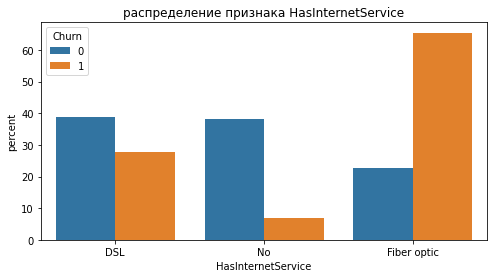

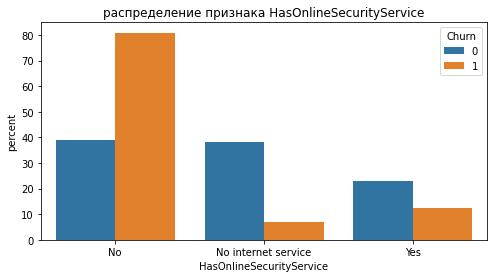

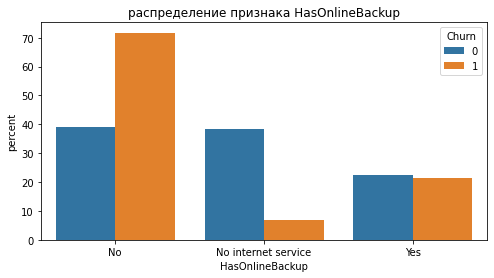

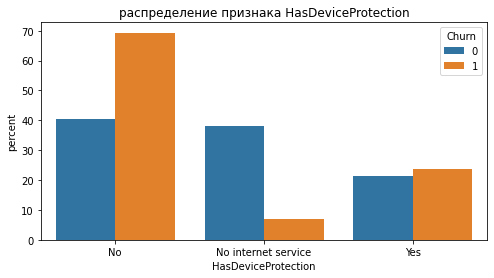

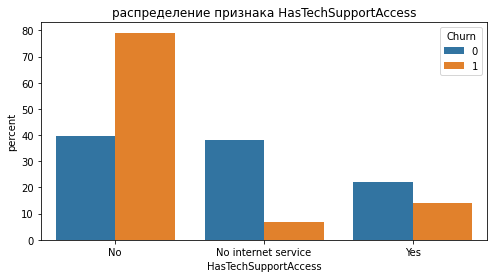

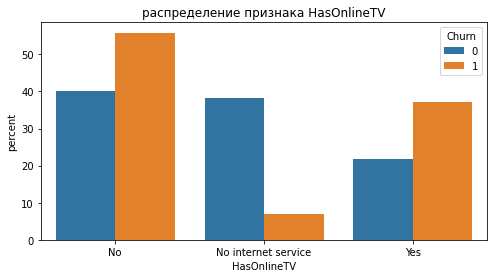

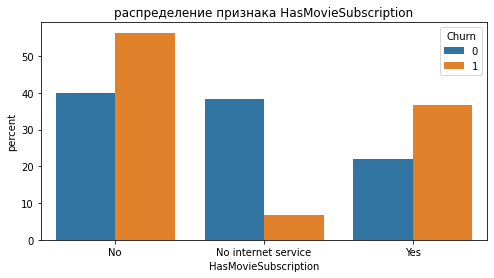

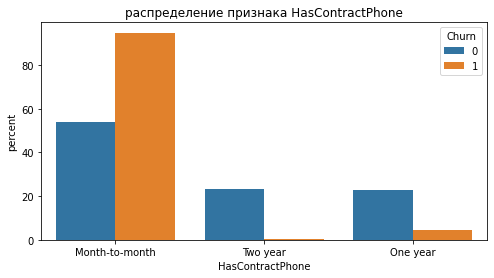

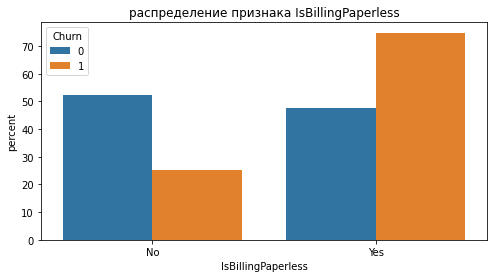

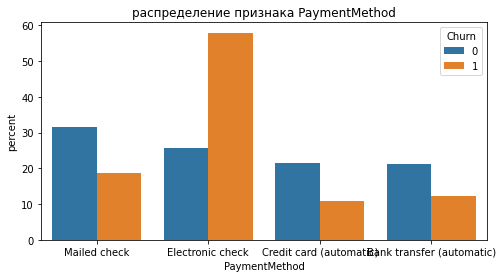

In [227]:
# теперь посмотрим распределение категориальных и бинарных признаков в зависимости от целевого признака
for col in cat_cols:
  plt.figure(figsize=(8, 4))
  prop_df = data[col].groupby(data[target_col]).value_counts(normalize=True).rename('percent').reset_index()
  prop_df['percent'] *=100
  sns.barplot(x=col, y='percent', hue=target_col, data=prop_df)
  plt.title(f'распределение признака {col}')

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

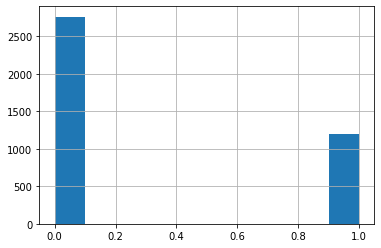

In [228]:
# YOUR CODE
data[target_col].hist()

*Классы не сбалансированы*

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [229]:
data.head(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,4.025352,3.020425,6.934738,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,4.290459,3.290266,7.535403,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,0.693147,4.342506,4.342506,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1


In [230]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [231]:
data[num_cols].isnull().sum()

ClientPeriod       0
MonthlySpending    0
TotalSpent         0
dtype: int64

In [246]:
# YOUR CODE
std = StandardScaler()
x_num = std.fit_transform(data[num_cols])
x_cat = OneHotEncoder(sparse=False).fit_transform(data[cat_cols].values)
X = np.hstack([x_cat, x_num])
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [233]:
lrc = LogisticRegressionCV(scoring='roc_auc', refit=True, random_state=42, cv=5, Cs=100).fit(X, y)

In [234]:
y_pred = lrc.predict(X_test)
roc_auc_score(y_test, y_pred) # 0.746247555626024

0.7435521378362666

In [235]:
model = LogisticRegression()
params = {'Cs': [100, 10, 1, 0.1, 0.01, 0.001]}
GSC_model = GridSearchCV(estimator=lrc, param_grid=params, scoring='roc_auc', n_jobs=-1, cv=3)

In [236]:
GSC_model.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegressionCV(Cs=100, class_weight=None, cv=5,
                                            dual=False, fit_intercept=True,
                                            intercept_scaling=1.0,
                                            l1_ratios=None, max_iter=100,
                                            multi_class='auto', n_jobs=None,
                                            penalty='l2', random_state=42,
                                            refit=True, scoring='roc_auc',
                                            solver='lbfgs', tol=0.0001,
                                            verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'Cs': [100, 10, 1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [237]:
GSC_model.best_params_

{'Cs': 100}

In [238]:
model = LogisticRegression(C=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
roc_auc_score(y_test, y_pred) # 0.746247555626024

0.7304433565879183

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [239]:
# YOUR CODE
!pip install catboost 

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [247]:
# data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/МФТИ/6. Д.З/train.csv')
y = data[target_col]
X = data.drop(target_col, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [278]:
import catboost
# params = {'n_estimators': [100, 200, 500, 1000], 'learning_rate' : li}
ct = catboost.CatBoostClassifier(n_estimators=100, eval_metric='AUC', learning_rate=0.05263157894736842)
ct.fit(X_train, y_train, cat_features=cat_cols, verbose=2)
y_pred = ct.predict(X_test)
roc_auc_score(y_test, y_pred) # 0.7238286824163627

0:	total: 4.3ms	remaining: 425ms
2:	total: 12.9ms	remaining: 417ms
4:	total: 20.7ms	remaining: 394ms
6:	total: 28.2ms	remaining: 374ms
8:	total: 35.8ms	remaining: 362ms
10:	total: 43.3ms	remaining: 350ms
12:	total: 48.9ms	remaining: 327ms
14:	total: 56.7ms	remaining: 321ms
16:	total: 64.3ms	remaining: 314ms
18:	total: 72ms	remaining: 307ms
20:	total: 79.6ms	remaining: 299ms
22:	total: 87.4ms	remaining: 293ms
24:	total: 94.6ms	remaining: 284ms
26:	total: 101ms	remaining: 272ms
28:	total: 107ms	remaining: 262ms
30:	total: 115ms	remaining: 256ms
32:	total: 122ms	remaining: 248ms
34:	total: 127ms	remaining: 235ms
36:	total: 135ms	remaining: 229ms
38:	total: 141ms	remaining: 221ms
40:	total: 150ms	remaining: 216ms
42:	total: 159ms	remaining: 210ms
44:	total: 167ms	remaining: 204ms
46:	total: 175ms	remaining: 197ms
48:	total: 183ms	remaining: 190ms
50:	total: 189ms	remaining: 182ms
52:	total: 201ms	remaining: 178ms
54:	total: 207ms	remaining: 170ms
56:	total: 215ms	remaining: 162ms
58:	total

0.7151296839490513

In [272]:
params = {'n_estimators': [100, 200, 500, 1000], 'learning_rate' : np.linspace(0, 1, 20)}
GSC_model = GridSearchCV(estimator=ct, param_grid=params, scoring='roc_auc', n_jobs=-1, cv=3)
GSC_model.fit(X, y, cat_features=cat_cols)

0:	total: 5.54ms	remaining: 549ms
1:	total: 10.6ms	remaining: 519ms
2:	total: 15.6ms	remaining: 503ms
3:	total: 20ms	remaining: 481ms
4:	total: 24.4ms	remaining: 464ms
5:	total: 29ms	remaining: 455ms
6:	total: 34.8ms	remaining: 462ms
7:	total: 39.9ms	remaining: 458ms
8:	total: 44.4ms	remaining: 449ms
9:	total: 49.1ms	remaining: 442ms
10:	total: 53.7ms	remaining: 434ms
11:	total: 58.3ms	remaining: 427ms
12:	total: 62.9ms	remaining: 421ms
13:	total: 67.7ms	remaining: 416ms
14:	total: 72.4ms	remaining: 410ms
15:	total: 77ms	remaining: 404ms
16:	total: 81.5ms	remaining: 398ms
17:	total: 86.1ms	remaining: 392ms
18:	total: 90.6ms	remaining: 386ms
19:	total: 95.2ms	remaining: 381ms
20:	total: 99.7ms	remaining: 375ms
21:	total: 104ms	remaining: 370ms
22:	total: 108ms	remaining: 362ms
23:	total: 113ms	remaining: 357ms
24:	total: 117ms	remaining: 352ms
25:	total: 120ms	remaining: 341ms
26:	total: 122ms	remaining: 329ms
27:	total: 126ms	remaining: 325ms
28:	total: 129ms	remaining: 315ms
29:	total

GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fb669b652d0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'n_estimators': [100, 200, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [273]:
GSC_model.best_params_

{'learning_rate': 0.05263157894736842, 'n_estimators': 100}

# Предсказания

In [242]:
best_model = ct# какая-то предыдущая модель

In [243]:
X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/МФТИ/6. Д.З/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/МФТИ/6. Д.З/submission.csv', index_col='Id')

submission['Churn'] = best_model.predict(X_test)
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/МФТИ/6. Д.З/my_submission.csv')

In [244]:
submission

,Churn
Id,
0,0
1,1
2,1
3,0
4,0
...,...
1756,0
1757,0
1758,1


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.